# Regressão Linear

Criando modelos de predição usando os calculos manuais como seriam feito a mão, e as bibliotecas Statsmodels e Sklearn.

### Importar pandas e matplotlib

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

### Criar um Data Frame de faturamento mensal de 12 meses

In [78]:
# Criando o faturamento
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [79]:
# Criando meses
mes = list(range(1,13))

In [80]:
# Criando dicionario 
data_dict = {'mes':mes,'faturamento':faturamento}

In [81]:
# Criando DataFrame
data = pd.DataFrame.from_dict(data_dict)

In [82]:
# Visualizando
data

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


### Visualizar dados em Gráfico de Dispersão

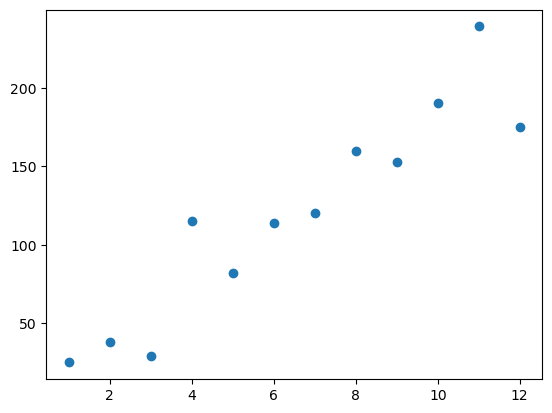

In [83]:
plt.scatter(x=data.mes, y=data.faturamento)

In [84]:
# A relação entre o mes e o faturamento é de 93%
data.corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

In [85]:
# Variaveis
x = data['mes']
y = data['faturamento']

### Calculando m

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

In [86]:
# Como seria feito a mão o calculo de m
m = (len(y) * (x*y).sum() - x.sum()*y.sum()) / (len(y) * (x**2).sum() - (x.sum())**2 )

In [87]:
# Visualizando
m

17.53846153846154

# b

$$b = \frac {\sum y-m\sum x}{n}$$

In [88]:
b = (y.sum() - m * x.sum()) / len(x)

In [89]:
b

5.999999999999981

### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

In [90]:
# Aqui iremos colocar o mes que queremos prever, sendo usado para qualquer mes
xpred = 15

In [91]:
# Lançando a formula
ypred = m * xpred + b

In [92]:
# Se mantivermos o mesmo padrão de venda essa será a estimativa de venda para o determinado mes
ypred

269.0769230769231

### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [93]:
# Gerando uma lista de predições
lista_pred = []
for elem in x:
    ypred = m * elem + b
    lista_pred.append(ypred)

In [94]:
# Visualizando a predição
lista_pred

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

## Inserir predições no DataFrame

In [95]:
data['predicoes'] = lista_pred

In [96]:
data

,mes,faturamento,predicoes
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


### Visualizar Regressão Linear

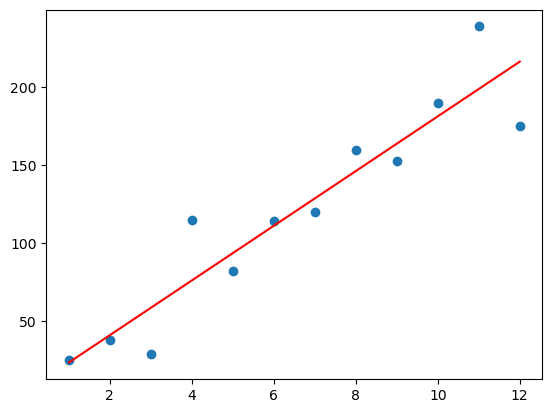

In [97]:
plt.scatter(x=data.mes, y=data.faturamento)
plt.plot(x, data.predicoes, color='red')  ## Gerando a linha da regressão linear
plt.show()

# Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

### Calcular Soma Quadrática dos Resíduos (SQres)

In [98]:
# É y - predicoes
data['residuos'] = data['faturamento'] - data['predicoes']

In [103]:
# SQres - é a soma do quadrado dos residuos
SQres = (data['residuos']**2).sum()
SQres

6323.538461538462

### Calcular Soma Quadrática Total (SQtot)

In [104]:
# Criando coluna do faturamento médio
data['faturam medio'] = data['faturamento'].mean()
data

,mes,faturamento,predicoes,residuos,faturam medio
0,1,25,23.538462,1.461538,120.0
1,2,38,41.076923,-3.076923,120.0
2,3,29,58.615385,-29.615385,120.0
3,4,115,76.153846,38.846154,120.0
4,5,82,93.692308,-11.692308,120.0
5,6,114,111.230769,2.769231,120.0
6,7,120,128.769231,-8.769231,120.0
7,8,160,146.307692,13.692308,120.0
8,9,153,163.846154,-10.846154,120.0
9,10,190,181.384615,8.615385,120.0


In [108]:
# SQtot
SQtot = ((data['faturamento'] - data['faturam medio'])**2).sum()
SQtot

50310.0

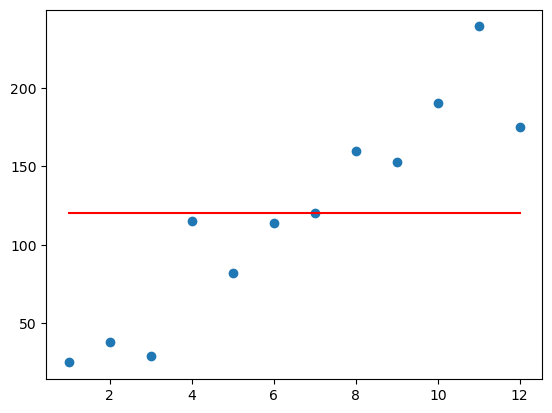

In [115]:
# Se usarmos a média para a linha de regressão teremos sempre o mesmo valor e não vamos ter a noção 
# exata dos dados e quão distante os valores estão, é dificil predizer os dados futuros dessa forma

plt.scatter(x=data.mes, y=data.faturamento)
plt.plot(x, data['faturam medio'], color='red')
plt.show()  ## Visualizando o modelo

### Calcular R-quadrado

In [119]:
R_Quad = 1-SQres/SQtot

# Esse é o valor do modelo preditivo, ele consegue explica 87% dos dados sendo uma boa avaliação
R_Quad

0.8743085179578918

# RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



In [124]:
(data['residuos']**2).sum()

6323.538461538462

In [125]:
SQres

6323.538461538462

### Importar numpy

In [123]:
import numpy as np

In [126]:
# Calculando a Raiz do Erro Quadrático Médio
rmse = np.sqrt(SQres/len(data))

In [128]:
# Quanto menor o valor é melhor, ele é como se fosse o desvio padrão
rmse

22.95564284574794

# Regra Empírica 68-95-99.7

In [133]:
# Um desvio pode ser explicado com 68% dos dados
um_acima = lista_pred + rmse
um_abaixo = lista_pred - rmse

In [135]:
# Dois desvio pode ser explicado com 95% dos dados
dois_acima = lista_pred + 2 *rmse
dois_abaixo = lista_pred - 2 *rmse

In [136]:
# Tres desvio pode ser explicado com 99,7% dos dados
tres_acima = lista_pred + 3 *rmse
tres_abaixo = lista_pred - 3 *rmse

# Um desvio padrão 68% 

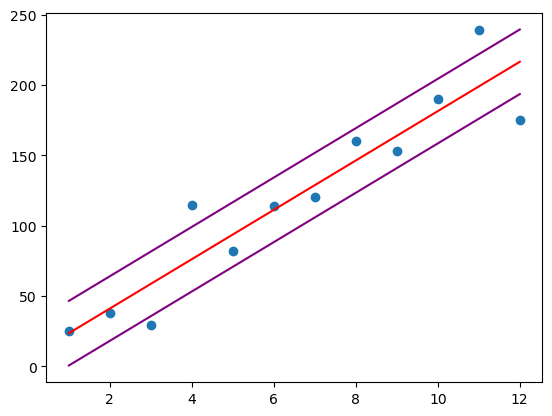

In [138]:
plt.scatter(x=data.mes, y=data.faturamento)
plt.plot(x, lista_pred, color='red')
plt.plot(x, um_acima, color='purple')
plt.plot(x, um_abaixo, color='purple')
plt.show()  ## Pela regra impirica 68% dos dados dentro desse range, sendo um desvio padrão

# Dois desvios padrões 95%

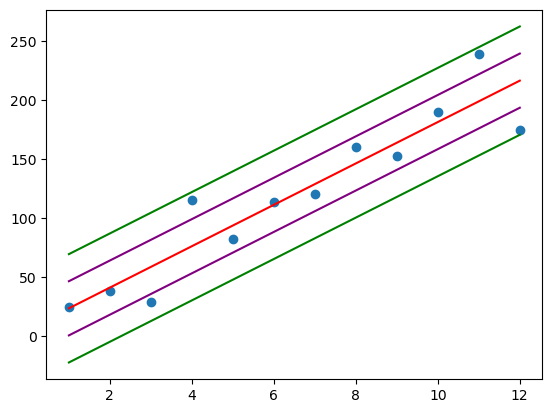

In [141]:
plt.scatter(x=data.mes, y=data.faturamento)
plt.plot(x, lista_pred, color='red')
plt.plot(x, um_acima, color='purple')
plt.plot(x, um_abaixo, color='purple')
plt.plot(x, dois_acima, color='green')
plt.plot(x, dois_abaixo, color='green')
plt.show()  ## Pela regra impirica 95% dos dados dentro desse range, sendo dois desvio padrão

# Três desvios padrões 99.7%

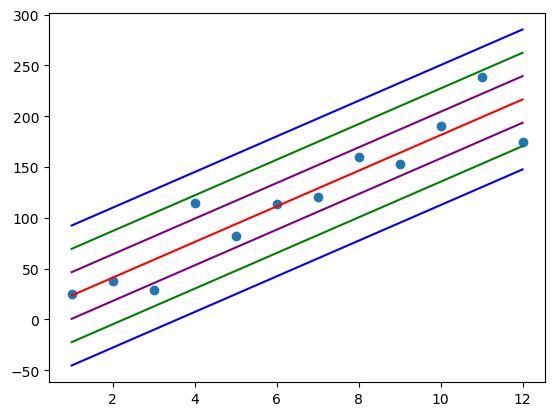

In [142]:
plt.scatter(x=data.mes, y=data.faturamento)
plt.plot(x, lista_pred, color='red')
plt.plot(x, um_acima, color='purple')
plt.plot(x, um_abaixo, color='purple')
plt.plot(x, dois_acima, color='green')
plt.plot(x, dois_abaixo, color='green')
plt.plot(x, tres_acima, color='blue')
plt.plot(x, tres_abaixo, color='blue')
plt.show()  ## Pela regra impirica 99,7% dos dados dentro desse range, sendo tres desvio padrão

# Regressão Linear - Statsmodels

Feito o módelo da forma manual agora usando uma biblioteca que facilitará todo o trabalho, o uso manual é para entender como os calculos para o módelo são feito, agora o uso da biblioteca irá comprovar os calculos manuais.

### Importar Statsmodels 

In [143]:
import statsmodels.api as sm

### Definir x e y

In [144]:
x = data['mes']
y = data['faturamento']

### Adicionar constante

In [145]:
# Necessário uma constante para o modelo nesse caso a constante era o valor de b
x = sm.add_constant(x.values)
x   # Antes era somente os meses agora temos esses valores de 1 para ajudar a lib

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

### Treinar Modelo

In [147]:
# Treinando o modelo preditivo usando o método Least Squares
modelo = sm.OLS(y,x).fit()

### Gerar predição

In [148]:
# Usando a função predict no modelo para as predições
sm_pred = modelo.predict()

In [154]:
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Verificar parâmetros de performance do Modelo Preditivo

In [155]:
modelo.summary()

C:\Users\wende\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Tue, 30 May 2023   Prob (F-statistic):           8.16e-06
Time:                        19:46:18   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RMSE

In [161]:
from statsmodels.tools.eval_measures import rmse

In [165]:
# É exatamente o mesmo valor da variavel calculada
rmse(y,sm_pred)

22.955642845747942

# Regressão Linear - Sklearn

### Importar sklearn

In [166]:
from sklearn import linear_model

### Instanciar Modelo de Regressão Linear

In [167]:
lm = linear_model.LinearRegression()

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [168]:
# Recolocando as variaveis x e y
x = data['mes']
y = data['faturamento'] 

In [174]:
# Necessario dar um reshape para que o sklearn prossiga sem erro
x = np.array(x).reshape(-1,1)

### Treinar Modelo

In [176]:
sk_modelo = lm.fit(x,y)

### Gerar predições

In [180]:
skpred = sk_modelo.predict(x)

In [185]:
# Testando com outros valores, necessario gerar um array e reshape
xpred = np.array([24]).reshape(-1,1)

In [186]:
# Vemos que o modelo entrega o mesmo valor feito no calculo em mãos
sk_modelo.predict(xpred)

array([426.92307692])

In [179]:
# Valores da predição
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### $R^2$

In [187]:
# O score é o R-Quadrado
lm.score(x,y)

0.8743085179578918

### m

In [188]:
# O coeficiente é o valor m
lm.coef_

array([17.53846154])

### b

In [189]:
# O intercept é o valor b ou a constante
lm.intercept_

6.000000000000028

### RMSE

In [190]:
# Importando uma função do sklearn
from sklearn.metrics import mean_squared_error

In [191]:
# passando os parametros
mse = mean_squared_error(y,skpred)

In [193]:
# Retornou esse valor mais o RMSE é a raiz quadrado do valor
mse

526.9615384615386

In [194]:
# Gerando o RMSE
np.sqrt(mse)

22.95564284574794

# Todas Predições

### Calculado Manualmente

In [195]:
np.array(lista_pred)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Statsmodel

In [197]:
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Sklearn

In [196]:
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])